Data 604 Final Project: Bicycle Shop Simulation

Leticia Salazar

July 17th, 2022

##### The problem and its significance. 

The bicycle industry has boomed within the last 2 years of a global pandemic. With bicycles, parts and accessories being scarces sales and repairs have been affected along with unusual wait times, delivery delays and more.

The following project simulates a 'typical' day at a bicycle shop, the services they provide and wait times pre-pandemic. 

Note: this does exclude phone calls and emails from customers and focusing only on in person interactions:

* Customer Arrival
* Meet with person working the floor: Depending on the type of service needed the customer will be going into one of three different service areas:
    * Random inquiries: using air pump, questions not related to the business, browsing, etc
    * Sales: looking to buy a bicycle, parts or accessories
        * Special orders: if items are not available some customers may decided to place an order (can take up to 2 days for the order to arrive)
    * Repairs: within this category there's different types of services
        * Short repair: flat fixes, minor adjustments (these usually take anywhere between 10 - 45 minutes)
        * Long repairs: tune-ups, bike assemblies, part replacements, major adjustments (these usually take between 1 hour - 1 business days)
* Normal Exit

##### Flow-chart model.

The process is shown below diplaying the different options customers have upon arrival and first interaction with floor person.

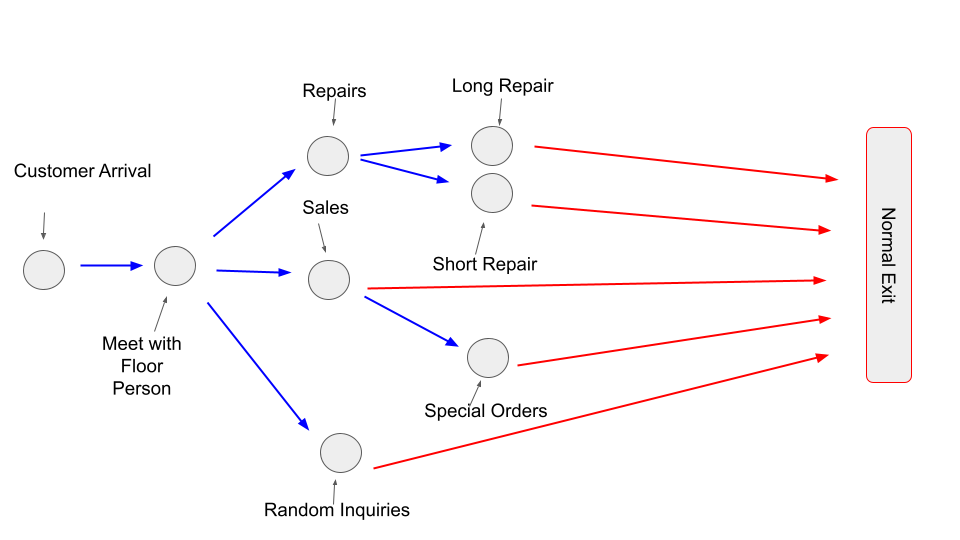

In [1]:
from IPython.display import Image
Image(filename = '/Users/letiix3/Desktop/Data-604/Week_7/Sim_bike_shop.png', width = 600, height = 700)

##### Simulate the process for the appropriate number of iterations (justify)

In [2]:
# Required libraries
import simpy
import numpy as np
import pandas as pd
import random
from modsim import *

In [3]:
# Setting seed and iterations
seed = 50
simulation_time = 8 # operational hours

In [4]:
np.random.seed(seed)
report = pd.DataFrame(columns = ['Customer Id', 'Service', 'Arrival Time', 'Floor Time', 'Service Start Time', 'Service Stop Time'])

In [5]:
# Setting customer arrival every 15 minutes from 2 - 5 customers
def customer_arrival():
    return np.random.exponential(15.0/np.random.randint(2,5))

# Setting time it takes for a customer to meet with floor person   
def meet_floor_person(self, customer):
    # min of 2 minutes and max of 10 minutes
    yield self.env.timeout(random.randint(2, 11)) 
        
# Setting time it takes for customer to be in repair station
def repair_service(self, customer):
    # min. of 10 minutes, average of 1 hour and max of 1 days in minutes
    return np.random.triangular(10,30,60)
    
# Setting time it takes for customer to be in sales station
def sales_service(self, customer):
    # min. of 15 minutes, avergae of 45 and max of 2 days in minutes
    return np.random.triangular(15,30,60)

# Setting time it takes for random inqiry to be completed
def random_service(self, customer):
    # min. of 1 minutes, average of 3, max of 5 minutes
    return np.random.triangular(1, 3, 5)       

In [6]:
# Defining customer's arrival time to bike shop
def bike_shop(env,  repair, sales, random):
    global current_hour
    # Counter for customer
    i = 0
    
    # For the 8 operational hours
    while True: 

        Service = np.random.choice(['Repair', 'Sales', 'Random'], p=[0.80, 0.1, 0.1])  # these values take the percentages of reach choice to be picked  
        i += 1
        yield env.timeout(customer_arrival())
        env.process(customer(env, i,  repair, sales, random, Service))

In [7]:
# Function to generate report for each customer
def customer(env, customer, repair, sales, random, Service):
    
    global report #access the global variable

    if Service == 'Sales':
        req = sales
    else:
        req = repair
    
    with sales.request() as request:
        arrival_time = env.now #starts the clock
        yield env.timeout(5) # Floor person generation time of 5 minutes
        floor_time = env.now # Records the time a floor person takes with a customer
        
        yield request
        service_start_time = env.now #service starts 
        
        if Service == 'Sales':
            yield env.timeout(sales_service())
        else:
            yield env.timeout(repair_service())
        service_stop_time = env.now 
        #record the data generated
        row = pd.DataFrame([['Customer_{}'.format(customer), Service, arrival_time, floor_time, service_start_time, service_stop_time]],
                          columns = ['Customer Id', 'Service', 'Arrival Time', 'Floor Time','Service Start Time', 'Service Stop Time'])
       
        report = report.append(row, ignore_index = True, sort = False)
        #Calculations for wait time
        report['Floor Time (Mins)'] = ( report['Floor Time'] - report['Arrival Time'])
        report['Service Time (Mins)'] =  (report['Service Stop Time'] - report['Service Start Time'])
        report['Wait Time (Mins)'] =  ( report['Service Start Time'] - report['Floor Time'] )

In [8]:
'''
# Function to generate report for each customer
def customer(env, customer, repair, sales, random, Service):
    # Access to global variable
    global report 

    if Service == 'Sales':
        req = sales
    else:
        req = repair
    
    with sales.request() as request:
        # Clock starts
        arrival_time = env.now
        yield env.timeout(5) # Floor person generation time of 5 minutes
        floor_time = env.now # Records the time a floor person takes with a customer 
        yield request
        
        # Service starts
        service_start_time = env.now 
       
        if Service == 'Sales':
            yield env.timeout(sales_service())
        else:
            yield env.timeout(repair_service())
        service_stop_time = env.now
        
        # Recording the data
        row = pd.DataFrame([['Customer_{}'.format(customer), Service, arrival_time, token_time, service_start_time, service_stop_time]],
                          columns = ['Customer Id', 'Service', 'Arrival Time', 'Floor Person Time','Service Start Time', 'Service Stop Time'])
       
        report = report.append(row, ignore_index = True, sort = False)
        
        #Calculationg wait times
        report['Floor Person Time (Mins)'] = ( report['Floor Person Time'] - report['Arrival Time'])
        report['Service Time (Mins)'] =  (report['Service Stop Time'] - report['Service Start Time'])
        report['Wait Time (Mins)'] =  ( report['Service Start Time'] - report['Floor Time'] )

'''

"\n# Function to generate report for each customer\ndef customer(env, customer, repair, sales, random, Service):\n    # Access to global variable\n    global report \n\n    if Service == 'Sales':\n        req = sales\n    else:\n        req = repair\n    \n    with sales.request() as request:\n        # Clock starts\n        arrival_time = env.now\n        yield env.timeout(5) # Floor person generation time of 5 minutes\n        floor_time = env.now # Records the time a floor person takes with a customer \n        yield request\n        \n        # Service starts\n        service_start_time = env.now \n       \n        if Service == 'Sales':\n            yield env.timeout(sales_service())\n        else:\n            yield env.timeout(repair_service())\n        service_stop_time = env.now\n        \n        # Recording the data\n        row = pd.DataFrame([['Customer_{}'.format(customer), Service, arrival_time, token_time, service_start_time, service_stop_time]],\n                      

In [9]:
#Running it in a model
def model(nruns, nrepair, nsales, nrandom): 
    
    # Initializing
    Repair=[] 
    Sales=[]
    Random=[]
    avg_wait_time = []
    sales_wait_time = []
    repair_wait_time = []
    random_wait_time = []
    
    global report
    for j in range(nruns):
        report = report[0:0]
        env = simpy.Environment()
        env.initial_time = 0
        
        # Assigning as Resource
        repair = simpy.Resource(env, capacity=nrepair) 
        sales = simpy.Resource(env, capacity=nsales) 
        random = simpy.Resource(env, capacity=nrandom) 
        env.process(bike_shop(env, repair, sales, random))
        # run for 8 operational hours
        env.run(until = 8 * 60) 
        
        # Calculating means separately to use later on
        Sales=report[report.Service.isin(['Sales'])] 
        Repair=report[report.Service.isin(['Repair'])]
        Random=report[report.Service.isin(['Random'])]
    
        # Calculating average time
        avg_wait=report['Wait Time (Mins)'].mean() 
        avg_wait_repair=Repair['Wait Time (Mins)'].mean()
        avg_wait_sales=Sales['Wait Time (Mins)'].mean()
        avg_wait_random=Random['Wait Time (Mins)'].mean()
    
        avg_wait_time.append(avg_wait)
        sales_wait_time.append(avg_wait_sales)
        repair_wait_time.append(avg_wait_repair)
        random_wait_time.append(avg_wait_random)
        
    # Save to a dataframe
    new_dictionary = {"avg_wait": avg_wait_time, "sales_wait": sales_wait_time, 
                "repair_wait": repair_wait_time, "random_wait": random_wait_time }
    
    global new_df
    new_df = pd.DataFrame(new_dictionary)
    fig = new_df.boxplot(grid = False, widths = 0.8)
    return new_df
    return fig

In [10]:
np.random.seed(75)
model(30,5,1,1)

TypeError: repair_service() missing 2 required positional arguments: 'self' and 'customer'

In [ ]:
report

##### Justify the validity of the model and discuss how you verified it.

##### State  your conclusions/ findings from the model. 

##### Generate appropriate graphs (more than one) to illustrate the results and provide a PowerPoint presentation to share with your colleagues.  Post this to the discussion. 